<a href="https://colab.research.google.com/github/kylemarzan/Math-200/blob/main/Python_Notebook_Setup_by_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Research Question # 1 : Is there an association between how many people you’re currently having a romantic/sexual relationship with and not being interested in other people’s problems?


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
url='https://drive.google.com/file/d/1IbHzUMYKFBkmW3TIvryP7XJlW-WkmGEw/view?usp=sharing'
path= 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
df = pd.read_csv(path)
df.head()

,AID,BIO_SEX,agew1,IMONTH4,IDAY4,IYEAR4,MACNO4,INTID4,BIO_SEX4,VERSION4,...,H4EO5C,H4EO5D,H4EO5E,H4EO5F,H4EO5G,H4EO5H,H4EO5I,H4EO5J,H4EO6,H4EO7
0,5710027,2,,,,,,,,,...,,,,,,,,,,
1,5710131,2,19.42739726,5,6,2008,2288160,160,2,V5.4,...,0,0,0,0,0,0,0,0,2,1
2,5710317,1,,,,,,,,,...,,,,,,,,,,
3,5710386,1,20.43013699,5,22,2008,2288238,238,1,V5.4,...,0,0,0,0,0,0,0,0,4,1
4,5710455,2,,,,,,,,,...,,,,,,,,,,


Codebook 1: H4TR4 CURRENT_RELATIONSHIPS
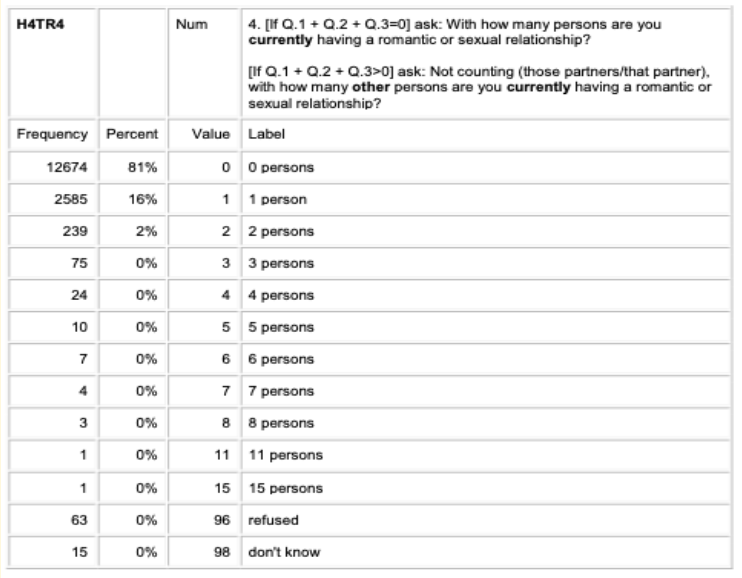

In [ ]:
#Manage data for variable 1

In [10]:
df['H4TR4'].dtype

dtype('O')

In [11]:
df['CURRENT_RELATIONSHIPS'] = df['H4TR4']
df['H4TR4'].dtype

dtype('O')

In [16]:
df['CURRENT_RELATIONSHIPS'] = pd.to_numeric(df['CURRENT_RELATIONSHIPS'] , errors = 'coerce' ) 
df['CURRENT_RELATIONSHIPS'].dtype

dtype('float64')

In [24]:
df['CURRENT_RELATIONSHIPS'] = df['CURRENT_RELATIONSHIPS'].loc[df['CURRENT_RELATIONSHIPS'] < 96]
df['CURRENT_RELATIONSHIPS'].max()

11.0

In [25]:
df['CURRENT_RELATIONSHIPS'].mean()

0.22056221741694515

In [19]:
pip install researchpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [20]:
import researchpy as rp

In [26]:
rp.summary_cont(df['CURRENT_RELATIONSHIPS'])

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,CURRENT_RELATIONSHIPS,5087.0,0.2206,0.5546,0.0078,0.2053,0.2358


In [27]:
rp.summarize(df['CURRENT_RELATIONSHIPS'])

,Name,N,Mean,Median,Variance,SD,SE,95% Conf. Interval
0,CURRENT_RELATIONSHIPS,5087,0.2206,0.0,0.3076,0.5546,0.0078,"[0.2053, 0.2358]"


In [28]:
df['CURRENT_RELATIONSHIPS'].describe()

count    5087.000000
mean        0.220562
std         0.554630
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        11.000000
Name: CURRENT_RELATIONSHIPS, dtype: float64

In [ ]:
#Graphs and tables or statistics

In [29]:
import seaborn as sns

<Axes: xlabel='CURRENT_RELATIONSHIPS', ylabel='Count'>

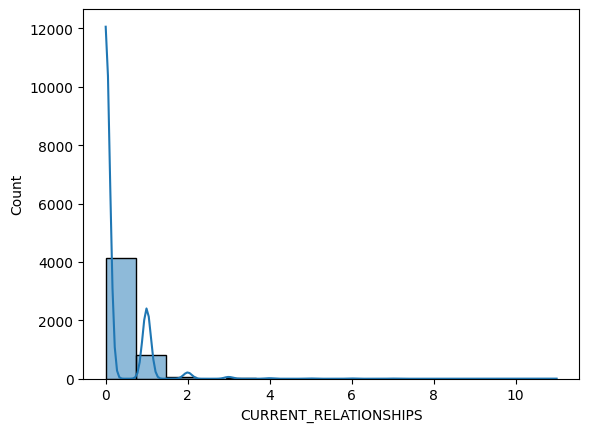

In [30]:
sns.histplot( x = 'CURRENT_RELATIONSHIPS', data = df, bins = 15, kde = True)

<Axes: xlabel='CURRENT_RELATIONSHIPS'>

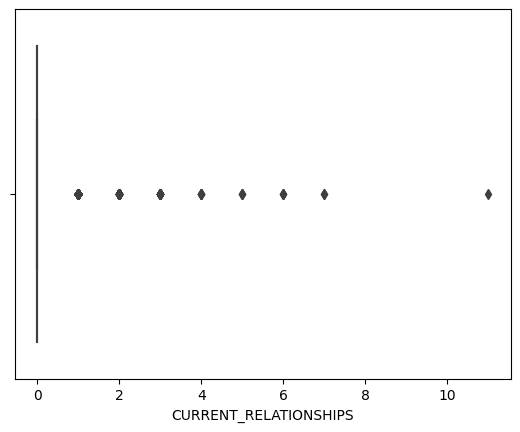

In [31]:
sns.boxplot( x = 'CURRENT_RELATIONSHIPS', data = df)

Codebook 2: H4PE10 UNINTERESTED_PROBLEMS
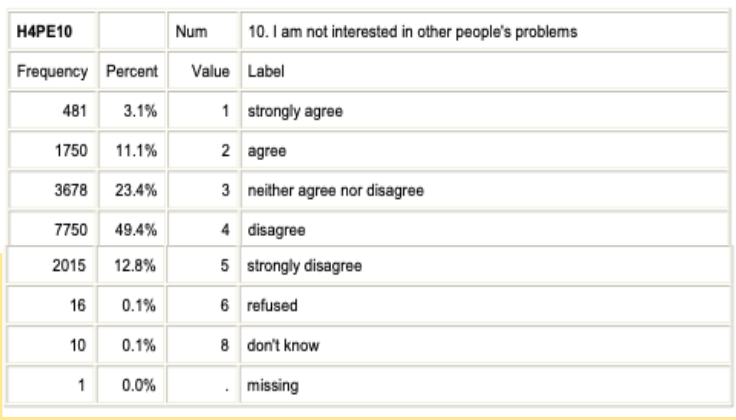

In [ ]:
#Manage data for variable 1

In [32]:
df['H4PE10'].value_counts()

4    2596
     1391
3    1117
5     687
2     553
1     151
6       6
8       3
Name: H4PE10, dtype: int64

In [33]:
df['UNINTERESTED_PROBLEMS'] = df['H4PE10']
df['UNINTERESTED_PROBLEMS'].value_counts()

4    2596
     1391
3    1117
5     687
2     553
1     151
6       6
8       3
Name: UNINTERESTED_PROBLEMS, dtype: int64

In [34]:
df['UNINTERESTED_PROBLEMS'] = df['UNINTERESTED_PROBLEMS'].loc[ df['UNINTERESTED_PROBLEMS'] !=' ' ] 
df['UNINTERESTED_PROBLEMS'].value_counts()

4    2596
3    1117
5     687
2     553
1     151
6       6
8       3
Name: UNINTERESTED_PROBLEMS, dtype: int64

In [35]:
df['UNINTERESTED_PROBLEMS'] = df['UNINTERESTED_PROBLEMS'].loc[ df['UNINTERESTED_PROBLEMS'] !='6']
df['UNINTERESTED_PROBLEMS'] = df['UNINTERESTED_PROBLEMS'].loc[ df['UNINTERESTED_PROBLEMS'] !='8']
df['UNINTERESTED_PROBLEMS'].value_counts()

4    2596
3    1117
5     687
2     553
1     151
Name: UNINTERESTED_PROBLEMS, dtype: int64

In [36]:
df['UNINTERESTED_PROBLEMS'].replace(['1','2','3','4','5'], ['STRONGLY AGREE','AGREE','NEITHER AGREE OR DISAGREE','DISAGREE','STRONGLY DISGAREE'] , inplace = True)
df['UNINTERESTED_PROBLEMS'].value_counts()

DISAGREE                     2596
NEITHER AGREE OR DISAGREE    1117
STRONGLY DISGAREE             687
AGREE                         553
STRONGLY AGREE                151
Name: UNINTERESTED_PROBLEMS, dtype: int64

In [8]:
pip install ResearchPy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
import researchpy as rp

In [37]:
rp.summary_cat(df['UNINTERESTED_PROBLEMS'])

,Variable,Outcome,Count,Percent
0,UNINTERESTED_PROBLEMS,DISAGREE,2596,50.86
1,,NEITHER AGREE OR DISAGREE,1117,21.88
2,,STRONGLY DISGAREE,687,13.46
3,,AGREE,553,10.83
4,,STRONGLY AGREE,151,2.96


In [ ]:
#Graphs and tables or statistics

<Axes: title={'center': "I am not interested in other people's problems"}, ylabel='UNINTERESTED_PROBLEMS'>

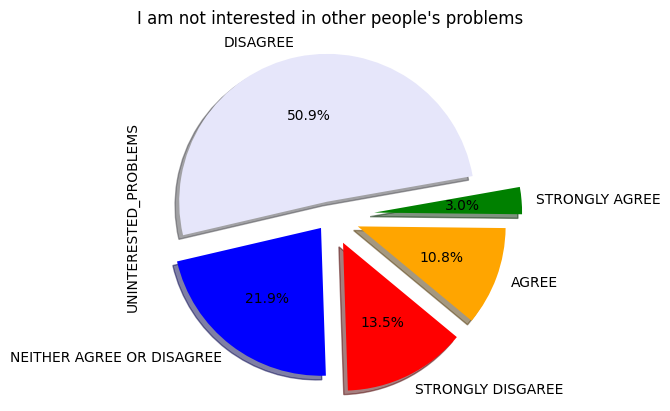

In [38]:
plt.title("I am not interested in other people's problems")
explode = (0.1, 0.1, 0.2, 0.2, 0.3)
df['UNINTERESTED_PROBLEMS'].value_counts().plot(kind ='pie', autopct='%1.1f%%', explode=explode, shadow=True, startangle=10, colors=['lavender', 'blue', 'red','orange','green'])

<Axes: title={'center': "I am not interested in other people's problems"}>

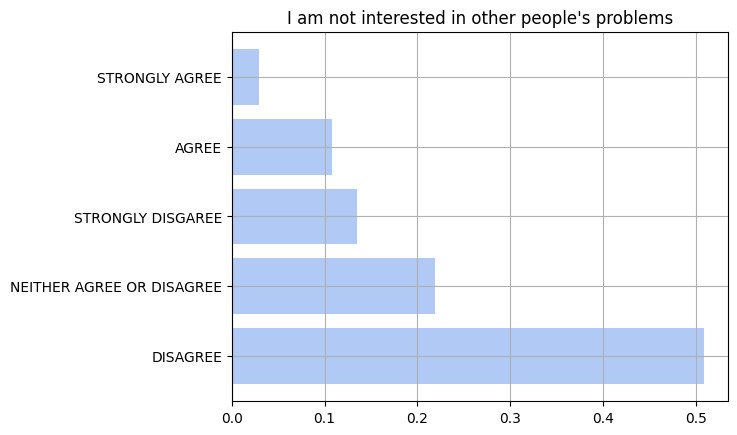

In [39]:
plt.xlabel("UNINTERESTED_PROBLEMS")
plt.title("I am not interested in other people's problems")
df['UNINTERESTED_PROBLEMS'].value_counts(normalize = True).plot(kind ='barh', color = 'cornflowerblue', width = 0.8, alpha = 0.5, grid = True)